<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Outliers/Act3.1/3_Valores_Atipicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importamos las libreerias pandas, numpy y matplotlib respectivamente
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#Cargar archivo csv desde equipo
data=pd.read_csv("Ventas_Totales_sin_nulos.csv")

In [19]:
data.drop('Unnamed: 0',axis=1, inplace=True)

In [20]:
#Verificamo la información del DF
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   indice_tiempo                        65 non-null     object 
 1   ventas_precios_corrientes            65 non-null     float64
 2   ventas_precios_constantes            65 non-null     float64
 3   ventas_totales_canal_venta           65 non-null     float64
 4   salon_ventas                         65 non-null     float64
 5   canales_on_line                      65 non-null     float64
 6   ventas_totales_medio_pago            65 non-null     float64
 7   efectivo                             65 non-null     float64
 8   tarjetas_debito                      65 non-null     float64
 9   tarjetas_credito                     65 non-null     float64
 10  otros_medios                         65 non-null     float64
 11  ventas_totales_grupo_articulos    

In [21]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

,0
indice_tiempo,0
ventas_precios_corrientes,0
ventas_precios_constantes,0
ventas_totales_canal_venta,0
salon_ventas,0
canales_on_line,0
ventas_totales_medio_pago,0
efectivo,0
tarjetas_debito,0
tarjetas_credito,0


In [26]:
#Creamos 2 DF's para poder procesar los outliers
cuantitativas=data.iloc[:,1:24]
cualitativas=data.iloc[:,[0]]

Metodo que detecta mayor numero de outliers: Rango intercuartílico y gráficamente se reresenta con caja y bigote

<Figure size 1500x800 with 0 Axes>

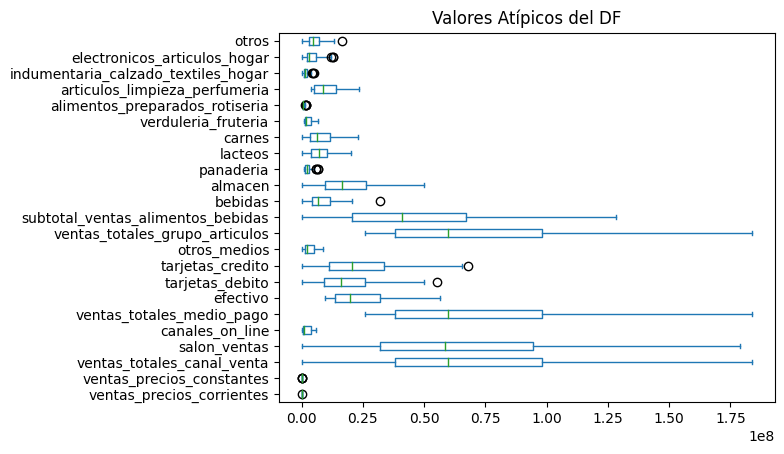

In [27]:
#Realizamos diagrama de caja o bigote de cada columna del DF
fig= plt.figure(figsize=(15 ,8))
cuantitativas.plot(kind='box', vert=False)
plt.title('Valores Atípicos del DF')
plt.show() #Dibujamos el diagrama

# Primer Metodo **Procedimiento "Desviación Estandar" para eliminar outliers en el DF**


In [31]:
#Método aplicando desvest. Encuentro los valores extremos
# 3 desviaciones estandar para la izquierda y derecha para encontrar los límites
y=cuantitativas
Limite_Superior= y.mean()+ 3*y.std()
Limite_Inferior= y.mean()- 3*y.std()
print('-Límite superior permitido\n', Limite_Superior,'\n')
print('-Límite inferior permitido\n', Limite_Inferior)

-Límite superior permitido
 ventas_precios_corrientes              2.143126e+05
ventas_precios_constantes              4.002291e+04
ventas_totales_canal_venta             2.074407e+08
salon_ventas                           2.075176e+08
canales_on_line                        7.623053e+06
ventas_totales_medio_pago              2.059531e+08
efectivo                               6.191160e+07
tarjetas_debito                        5.861864e+07
tarjetas_credito                       7.611202e+07
otros_medios                           1.055233e+07
ventas_totales_grupo_articulos         2.059531e+08
subtotal_ventas_alimentos_bebidas      1.532514e+08
bebidas                                2.665513e+07
almacen                                5.596359e+07
panaderia                              6.984940e+06
lacteos                                2.243904e+07
carnes                                 2.525153e+07
verduleria_fruteria                    7.593897e+06
alimentos_preparados_rotiseria      

In [35]:
#Verifiacr Outliers
data2 = cuantitativas[(y>Limite_Superior)|(y<Limite_Inferior)]
data2.count()

,0
ventas_precios_corrientes,0
ventas_precios_constantes,2
ventas_totales_canal_venta,0
salon_ventas,0
canales_on_line,0
ventas_totales_medio_pago,0
efectivo,0
tarjetas_debito,0
tarjetas_credito,0
otros_medios,0


In [37]:
#Obtenemos los datos y los Outliers se convierten en nulos en el DF
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,1716991.073,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,1527488.518,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,1782030.557,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,1909221.374,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,1864714.157,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,154517.1,NaN,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,7452508.718,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,6922148.759,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,0.000000e+00,9.189746e+06,1.330139e+07
62,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,0.000000e+00,7940040.869,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,0.000000e+00
63,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,6.535759e+07,0.000,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,0.000000e+00,1.191048e+07


In [38]:
#Corroboramos valores nulos del DF
valores_nulos= data3.isnull().sum()
valores_nulos

,0
ventas_precios_corrientes,0
ventas_precios_constantes,2
ventas_totales_canal_venta,0
salon_ventas,0
canales_on_line,0
ventas_totales_medio_pago,0
efectivo,0
tarjetas_debito,0
tarjetas_credito,0
otros_medios,0


In [40]:
#Reemplazamos valores atípicos (nulos) del DF con "mean"
#Realizamos copia del DF
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,1716991.073,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,1527488.518,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,1782030.557,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,1909221.374,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,1864714.157,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,154517.1,25363.3,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,7452508.718,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,1.218755e+07,1.343307e+07
61,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,6922148.759,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,0.000000e+00,9.189746e+06,1.330139e+07
62,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,0.000000e+00,7940040.869,...,4.541886e+07,5.922820e+06,1.841916e+07,2.082760e+07,6.886240e+06,1.589119e+06,2.294201e+07,3.912852e+06,1.089879e+07,0.000000e+00
63,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,6.535759e+07,0.000,...,4.999168e+07,6.746167e+06,1.930946e+07,2.287784e+07,6.510666e+06,1.719459e+06,2.313127e+07,4.228054e+06,0.000000e+00,1.191048e+07


In [42]:
#Corroboramos valores nulos del DF
valores_nulos= data_clean.isnull().sum()
valores_nulos

,0
ventas_precios_corrientes,0
ventas_precios_constantes,0
ventas_totales_canal_venta,0
salon_ventas,0
canales_on_line,0
ventas_totales_medio_pago,0
efectivo,0
tarjetas_debito,0
tarjetas_credito,0
otros_medios,0


# Segundo Metodo **Procedimiento "Cuantiles" para eliminar outliers en el DF**


In [45]:
y=cuantitativas

percentiles25=y.quantile(0.25) #Q1
percentiles75=y.quantile(0.75) #Q3
iqr= percentiles75-percentiles25

Limite_Superior_iqr=percentiles75 + 1.5*iqr
Limite_Inferior_iqr=percentiles25- 1.5*iqr
print("Límite superior permitido: \n",Limite_Superior_iqr)
print("\nLímite inferior permitido: \n",Limite_Inferior_iqr)

Límite superior permitido: 
 ventas_precios_corrientes              1.923194e+05
ventas_precios_constantes              3.193875e+04
ventas_totales_canal_venta             1.875116e+08
salon_ventas                           1.881567e+08
canales_on_line                        9.196781e+06
ventas_totales_medio_pago              1.875116e+08
efectivo                               5.942022e+07
tarjetas_debito                        5.150700e+07
tarjetas_credito                       6.724505e+07
otros_medios                           1.074414e+07
ventas_totales_grupo_articulos         1.875116e+08
subtotal_ventas_alimentos_bebidas      1.369281e+08
bebidas                                2.286534e+07
almacen                                5.094749e+07
panaderia                              5.344003e+06
lacteos                                2.012752e+07
carnes                                 2.396900e+07
verduleria_fruteria                    7.832862e+06
alimentos_preparados_rotiseria     

In [46]:
#Obtenemos datos limpios del DF
data3_iqr=cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,1716991.073,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,2.806660e+06
1,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,1527488.518,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,2.354085e+06
2,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,1782030.557,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,2.266189e+06
3,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,1909221.374,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,2.146756e+06
4,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,1864714.157,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,2.117971e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,154517.1,NaN,1.545171e+08,1.496976e+08,4.819480e+06,1.545171e+08,4.696260e+07,4.605365e+07,5.404833e+07,7452508.718,...,3.750517e+07,4.860318e+06,1.610477e+07,1.740849e+07,6.138441e+06,1.401929e+06,2.133021e+07,3.782646e+06,NaN,1.343307e+07
61,152202.6,23802.1,1.522026e+08,1.484065e+08,3.796044e+06,1.522026e+08,4.629096e+07,4.528358e+07,5.370589e+07,6922148.759,...,3.820979e+07,5.045920e+06,1.613982e+07,1.826074e+07,6.436028e+06,1.370640e+06,2.030545e+07,0.000000e+00,9.189746e+06,1.330139e+07
62,16.5,24612.4,1.689825e+08,1.643211e+08,4.661350e+05,1.689825e+08,5.126208e+07,4.736436e+07,0.000000e+00,7940040.869,...,4.541886e+07,NaN,1.841916e+07,2.082760e+07,6.886240e+06,NaN,2.294201e+07,3.912852e+06,1.089879e+07,0.000000e+00
63,177148.1,24140.5,1.771481e+08,1.730038e+08,4.144284e+06,1.771481e+08,5.319000e+07,5.006397e+07,6.535759e+07,0.000,...,4.999168e+07,NaN,1.930946e+07,2.287784e+07,6.510666e+06,NaN,2.313127e+07,NaN,0.000000e+00,1.191048e+07


In [47]:
#Corroboramos valores nulos del DF Limpio
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

,0
ventas_precios_corrientes,1
ventas_precios_constantes,3
ventas_totales_canal_venta,0
salon_ventas,0
canales_on_line,0
ventas_totales_medio_pago,0
efectivo,0
tarjetas_debito,1
tarjetas_credito,1
otros_medios,0


In [48]:
#Remplazamos valores atípicos (nulos) con del DF con "mean"
#Realizamos una copia del DF
data_4_iqr= data3_iqr.copy()
data_4_iqr=data_4_iqr.fillna(round(data3_iqr.mean(),1))

# Generacion de DF's

In [56]:
#Unimos el DF cuantitativo limpioo con el DF cualitativo, iqr

Datos_Limpios_iqr=pd.concat([cualitativas,data_4_iqr], axis=1)
Datos_Limpios_iqr.head()

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,9047205.493,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1.050314e+06,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309
1,01/02/2017,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,8309150.301,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1.026167e+06,328288.6951,4053283.771,672290.5165,1257661.903,2354084.901
2,01/03/2017,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,8845010.494,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1.075526e+06,353335.1548,4354197.611,667696.6653,1305674.917,2266189.277
3,01/04/2017,29134.3,27045.9,29134272.22,28827479.49,306792.733,29134272.22,1.031263e+07,7454251.800,9458166.682,...,8211244.093,1.132396e+06,3257140.159,3006158.760,1.037213e+06,359694.4537,4355706.646,838948.2458,1535726.345,2146755.887
4,01/05/2017,27969.0,25631.9,27969004.68,27569311.41,399693.262,27969004.68,1.014761e+07,6735747.319,9220929.862,...,7651058.084,1.033082e+06,3232635.767,2799142.123,9.826512e+05,336568.0085,4206101.605,915895.1498,1824462.036,2117971.483


In [52]:
#Unimos el DF cuantitativo limpio con el DF cualitativo, DesVest

Datos_Limpios_DesVest=pd.concat([cualitativas,data_clean],axis=1)
Datos_Limpios_DesVest.head()

,indice_tiempo,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,otros
0,01/01/2017,27858.9,27477.3,27858872.08,27591730.13,267141.956,27858872.08,1.023010e+07,6864575.384,9047205.493,...,6705475.318,9.459063e+05,2880656.169,2606192.942,1.050314e+06,340777.3882,4397543.671,772371.8476,1838507.096,2806660.309
1,01/02/2017,25994.2,25223.4,25994200.17,25749179.40,245020.769,25994200.17,9.719067e+06,6438494.011,8309150.301,...,6576624.803,9.256186e+05,2855639.900,2600083.591,1.026167e+06,328288.6951,4053283.771,672290.5165,1257661.903,2354084.901
2,01/03/2017,27780.0,26334.3,27780006.52,27472228.72,307777.804,27780006.52,1.024444e+07,6908522.962,8845010.494,...,7437264.174,1.016148e+06,3188259.169,2824976.726,1.075526e+06,353335.1548,4354197.611,667696.6653,1305674.917,2266189.277
3,01/04/2017,29134.3,27045.9,29134272.22,28827479.49,306792.733,29134272.22,1.031263e+07,7454251.800,9458166.682,...,8211244.093,1.132396e+06,3257140.159,3006158.760,1.037213e+06,359694.4537,4355706.646,838948.2458,1535726.345,2146755.887
4,01/05/2017,27969.0,25631.9,27969004.68,27569311.41,399693.262,27969004.68,1.014761e+07,6735747.319,9220929.862,...,7651058.084,1.033082e+06,3232635.767,2799142.123,9.826512e+05,336568.0085,4206101.605,915895.1498,1824462.036,2117971.483


In [53]:
Datos_Limpios_DesVest.to_csv('Datos_Limpios_DesVest.csv')

In [57]:
Datos_Limpios_iqr.to_csv('Datos_Limpios_iqr.csv')